<a href="https://colab.research.google.com/github/mitaskin/DeepLearning_Basic_Application/blob/main/mitaskin_msc_deeplearning_midtermexample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
 Work for Deep Learning lesson. 
* Muhammed ikbal TAŞKIN
* Kahramanmaraş Sütçü İmam University
* 2022 November
* Reference
  * Oğuzhan GÜRBÜZ


# **Setup DataSet**

##Downlading MNIST Dataset 

* Download the **MNIST** Dataset. 
* We loaded data some in train and validation 
* from this link *https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz*
---

> train_img --> reference for handwriting image (28x28 pixel).

> train_labels --> reference for image to which numbers



In [ ]:
from keras.datasets import mnist
(train_img, train_labels) = mnist.load_data()[0]
(test_img, test_labels) = mnist.load_data()[1]

11490434/11490434 [==============================] - 0s 0us/step


## Verification of Data


*Shape of Train Images:  ( Total Image Count, X_Pixel, Y_Pixel)

*Shape of Test Images:  ( Total Image Count, X_Pixel, Y_Pixel)

In [ ]:
print("Shape of Train Images: ",train_img.shape)
print("Shape of Test Images: ",test_img.shape)

Shape of Train Images:  (60000, 28, 28)
Shape of Test Images:  (10000, 28, 28)


## Print a random image



*   Import Matlab Plot for graph drawing
*   plt.imgshow(image_src, cmap='gray_r')
  * gray_r --> for inverse gray scale
  * gray.  --> for non-inverse gray scale



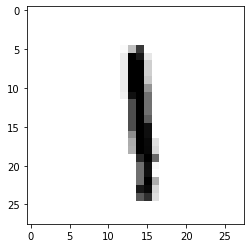

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_img[8], cmap='gray_r')
plt.show()

## Print Raw Matrix Data

The meaning of some values.

* "%3s" --> print three spaces
* %i --> print values
* end=' ' --> add a space at the end of print

In [ ]:
for row in train_img[8]:
    for i in row:
        print("%3s "%i, end='')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   5  63 197   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0  20 254 230  24   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0  20 254 254  48   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0  20 254 255  48   0   0   0   0   0   0   0   0 

## Print Collective images

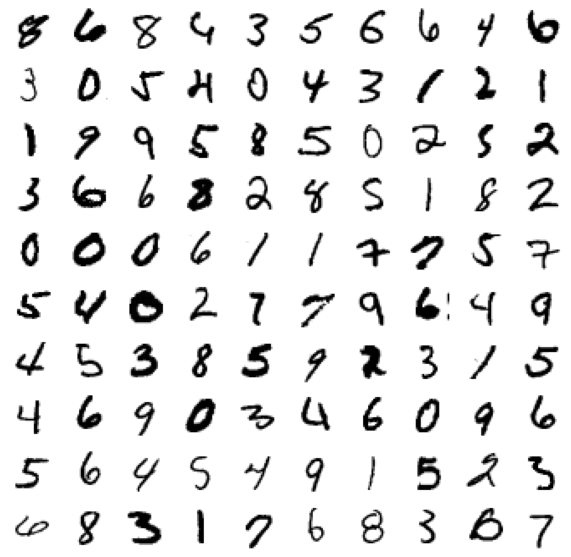

In [ ]:
import numpy as np

n, k, figsize = 10, 10, (10, 10)
fig, ax = plt.subplots(n, k, figsize=figsize)
for i in range(n):
    for j in range(k):
        ax[i,j].imshow(train_img[np.random.randint(train_img.shape[0])], cmap='gray_r')
        ax[i,j].axis('off')

plt.show()

## Convert The Values To Decimal

In [ ]:
train_img = train_img.reshape((60000,28*28))
train_img = train_img.astype("float32")/255

test_img = test_img.reshape((10000,28*28))
test_img = test_img.astype("float32")/255

## Encode Tags Categorically

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



---



# **Create Network**

## Import Keras Library



*   We create a two-layers network
*   If you wish you can increase the number of layer and 
*   compare succes of layer with other different activation function.



In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation="relu", input_shape=(28*28,)))
model.add(layers.Dense(10,activation="softmax"))

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Train Model

In [ ]:
history = model.fit(train_img,
                    train_labels,
                    epochs=10,
                    batch_size=128)

Epoch 1/10
469/469 [==============================] - 6s 10ms/step - loss: 0.2542 - accuracy: 0.9265
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1041 - accuracy: 0.9689
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0682 - accuracy: 0.9790
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0487 - accuracy: 0.9856
Epoch 5/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0381 - accuracy: 0.9884
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0284 - accuracy: 0.9917
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0218 - accuracy: 0.9934
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0170 - accuracy: 0.9946
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0132 - accuracy: 0.9961
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0100 - accuracy: 0.

In [ ]:
history_dict = history.history
print("Keys: ",history_dict.keys())

Keys:  dict_keys(['loss', 'accuracy'])


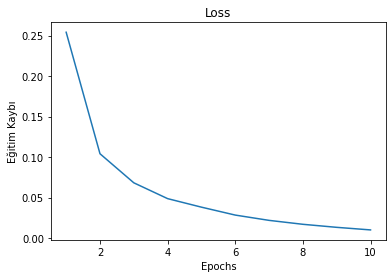

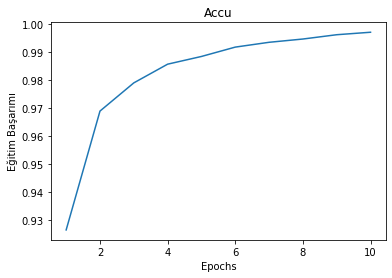

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1,11)
loss = history_dict['loss']
accuracy = history_dict['accuracy']

plt.plot(epochs,loss)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Eğitim Kaybı")
plt.show()

plt.plot(epochs,accuracy)
plt.title("Accu")
plt.xlabel("Epochs")
plt.ylabel("Eğitim Başarımı")
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_img,test_labels)
print("Test Loss: ",test_loss)
print("Test Accuracy: ",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0744 - accuracy: 0.9808
Test Loss:  0.07439759373664856
Test Accuracy:  0.9807999730110168
